<img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/>

# Learning Linear Regression #
By Richard Sowers
* <r-sowers@illinois.edu>
* <https://publish.illinois.edu/r-sowers/>

Copyright 2020 University of Illinois Board of Trustees. All Rights Reserved.

### imports and graphics configurations ###

In [ ]:
import os
import numpy
import pandas
import time
import random
import matplotlib
#%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import scipy.stats
#from pandas.plotting import autocorrelation_plot
import matplotlib.offsetbox as offsetbox
from matplotlib.ticker import StrMethodFormatter

import imageio
import PIL

def saver(fname):
    plt.savefig(fname+".png",bbox_inches="tight")

def legend(pos="bottom",ncol=3,extra=False):
    if pos=="bottom":
        extra = 0.15 if extra else 0
        plt.legend(bbox_to_anchor=(0.5,-0.2-extra), loc='upper center',facecolor="lightgray",ncol=ncol)
    elif pos=="side":
        plt.legend(bbox_to_anchor=(1.1,0.5), loc='center left',facecolor="lightgray",ncol=1)

def textbox(txt,fname=None):
    plt.figure(figsize=(1,1))
    plt.gca().add_artist(offsetbox.AnchoredText("\n".join(txt), loc="center",prop=dict(size=30)))
    plt.axis('off')
    if fname is not None:
        saver(fname)
    plt.show()
    plt.close()

In [ ]:
import torch
from torch.autograd import Variable
x = Variable(torch.tensor(7.0), requires_grad=True)
f=2*x
g=3*x
f.backward()
print("df/dx={0:.1f}".format(x.grad.item()))
g.backward(retain_graph=True)
print("dg/dx={0:.1f}".format(x.grad.item()))
g.backward()
print("dg/dx={0:.1f}".format(x.grad.item()))
g.zero_()
print(g)



df/dx=2.0
dg/dx=5.0
dg/dx=8.0
tensor(0., grad_fn=<ZeroBackward>)


In [ ]:
#for some reason, this needs to be in a separate cell
params={
    "font.size":15,
    "lines.linewidth":5
}
plt.rcParams.update(params)

In [ ]:
pngfiles=[f for f in os.listdir(".") if f.endswith(".png")]
print("existing png files: "+str(pngfiles))
#print([os.remove(f) for f in pngfiles])

existing png files: []


In [ ]:
def getfile(location_pair,**kwargs): #tries to get local version and then defaults to google drive version
    (loc,gdrive)=location_pair
    try:
        out=pandas.read_csv(loc,**kwargs)
    except FileNotFoundError:
        print("local file not found; accessing Google Drive")
        loc = 'https://drive.google.com/uc?export=download&id='+gdrive.split('/')[-2]
        out=pandas.read_csv(loc,**kwargs)
    return out

### configuration variables###

In [ ]:
url="https://www.redfin.com"
fname=("redfin_data.csv","https://drive.google.com/file/d/1ei7JaZ4M1lrw3TyYcWozESi8HrHccnUx/view?usp=sharing")
plot_title="Home Asking Price (Redfin)"
data_color="red"
markersize=2
thinlinesize=2
textboxsize=(5,0.5)

### code starts here###

In [ ]:
(feature,label)=("SQUARE FEET","PRICE")

In [ ]:
text="\\begin{{center}}data provided by \\url{{{0:s}}}, a national real estate brokerage\\end{{center}}"
with open("dataurl.tex","w") as f:
    f.write(text.format(url))
f.close()

### load data ###

In [ ]:
data_raw=getfile(fname)

local file not found; accessing Google Drive


In [ ]:
data_raw.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,MLS Listing,NaN,Condo/Co-op,525 W Hawthorne Pl #1607,Chicago,IL,60657,265000.0,2.0,1.0,Lake View,1000.0,NaN,1969.0,1,265.0,637.0,Active,May-8-2021 02:00 PM,May-8-2021 04:00 PM,http://www.redfin.com/IL/Chicago/525-W-Hawthor...,MRED,11051015,N,Y,41.944437,-87.642365
1,MLS Listing,NaN,Condo/Co-op,100 E 14th St #2310,Chicago,IL,60605,554000.0,2.0,2.0,Near South Side,1395.0,NaN,2008.0,1,397.0,656.0,Active,NaN,NaN,http://www.redfin.com/IL/Chicago/100-E-14th-St...,MRED,11072321,N,Y,41.864520,-87.623806
2,MLS Listing,NaN,Condo/Co-op,6559 W George St #305,Chicago,IL,60634,250000.0,2.0,2.0,Belmont Cragin,1400.0,NaN,2004.0,1,179.0,329.0,Active,NaN,NaN,http://www.redfin.com/IL/Chicago/6559-W-George...,MRED,11075707,N,Y,41.931970,-87.790180
3,MLS Listing,NaN,Condo/Co-op,100 E 14th St #2301,Chicago,IL,60605,754000.0,3.0,2.0,Near South Side,1695.0,NaN,2008.0,1,445.0,1010.0,Active,May-8-2021 02:00 PM,May-8-2021 04:00 PM,http://www.redfin.com/IL/Chicago/100-E-14th-St...,MRED,11072282,N,Y,41.864520,-87.623806
4,MLS Listing,NaN,Condo/Co-op,2637 W Belmont Ave #2,Chicago,IL,60618,324900.0,2.0,2.0,Avondale,1500.0,NaN,2003.0,1,217.0,152.0,Active,NaN,NaN,http://www.redfin.com/IL/Chicago/2637-W-Belmon...,MRED,11066189,N,Y,41.939170,-87.694463


In [ ]:
data=data_raw.copy()
data.index+=1
data.index.name="record number"
XY=data[[feature,label]].dropna(axis='index')
X=XY[feature].squeeze()/1000
Y=XY[label].squeeze()/1.0E6
m_opt,b_opt,_,_,_=scipy.stats.linregress(X,Y)
print("m_opt = {0:} and b_opt= {1:}".format(m_opt,b_opt))

m_opt = 0.2718547212372187 and b_opt= 0.04152297083103035


In [ ]:
data.head(1).transpose().to_latex(buf="sample_data.tex",bold_rows=True)

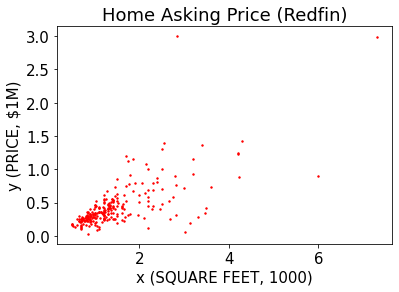

In [ ]:
plt.figure()
plt.scatter(X,Y,color=data_color,s=markersize)
title=[]
title.append(plot_title)
plt.title("\n".join(title))
plt.xlabel("x ({0:s}, 1000)".format(feature))
plt.ylabel("y ({0:s}, $1M)".format(label))
#tick = mtick.StrMethodFormatter("${x:,.0f}")
#plt.gca().yaxis.set_major_formatter(tick)
saver("xyplot")
plt.show()
plt.close()

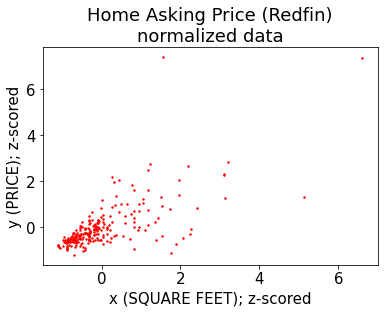

In [ ]:
X_scored=scipy.stats.zscore(X)
Y_scored=scipy.stats.zscore(Y)
plt.figure()
plt.scatter(X_scored,Y_scored,color=data_color,s=markersize)
title=[]
title.append(plot_title)
title.append("normalized data")
plt.title("\n".join(title))
plt.xlabel("x ({0:s}); z-scored".format(feature))
plt.ylabel("y ({0:s}); z-scored".format(label))
saver("xyplot_scored")
plt.show()
plt.close()

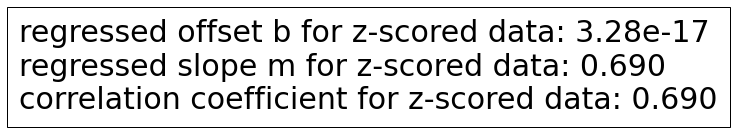

In [ ]:
m_opt_scored,b_opt_scored,_,_,_=scipy.stats.linregress(X_scored,Y_scored)
corcoeff=numpy.corrcoef(X_scored,Y_scored)[0,1]
text=[]
text.append("regressed offset b for z-scored data: {0:.2e}".format(b_opt_scored))
text.append("regressed slope m for z-scored data: {0:.3f}".format(m_opt_scored))
text.append("correlation coefficient for z-scored data: {0:.3f}".format(corcoeff))
textbox(text,fname="scored_regression")

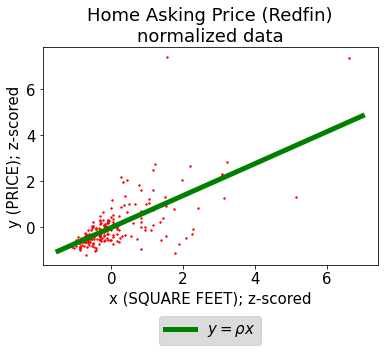

In [ ]:
X_scored=scipy.stats.zscore(X)
Y_scored=scipy.stats.zscore(Y)
plt.figure()
plt.scatter(X_scored,Y_scored,color=data_color,s=markersize)
x_range=numpy.array(plt.xlim())
plt.plot(x_range,corcoeff*x_range,color="green",label=r"$y=\rho x$")
title=[]
title.append(plot_title)
title.append("normalized data")
plt.title("\n".join(title))
plt.xlabel("x ({0:s}); z-scored".format(feature))
plt.ylabel("y ({0:s}); z-scored".format(label))
legend("bottom")
saver("xyplot_scored_line")
plt.show()
plt.close()

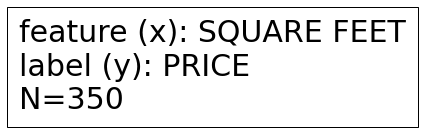

In [ ]:
text=[]
text.append("feature (x): {0:s}".format(feature))
text.append("label (y): {0:s}".format(label))
text.append("N={0:d}".format(len(data)))
textbox(text,fname="dataset")

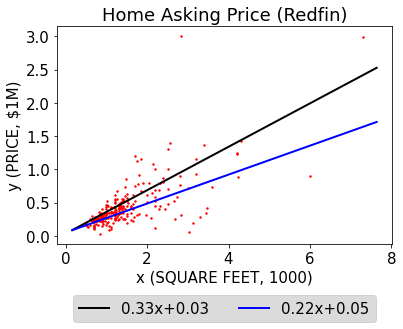

In [ ]:
(m_1,b_1,firstcolor)=(1.2*m_opt,0.8*b_opt,"black")
(m_2,b_2,secondcolor)=(0.8*m_opt,1.2*b_opt,"blue")
plt.figure()
plt.scatter(X,Y,color=data_color,s=markersize)
xlims=numpy.array(plt.gca().get_xlim())
plt.plot(xlims,m_1*xlims+b_1,label="{0:.2f}x+{1:.2f}".format(m_1,b_1),color=firstcolor,linewidth=thinlinesize)
plt.plot(xlims,m_2*xlims+b_2,label="{0:.2f}x+{1:.2f}".format(m_2,b_2),color=secondcolor,linewidth=thinlinesize)
title=[]
title.append(plot_title)
plt.title("\n".join(title))
plt.xlabel("x ({0:s}, 1000)".format(feature))
plt.ylabel("y ({0:s}, $1M)".format(label))
#tick = mtick.StrMethodFormatter("${x:,.0f}")
#plt.gca().yaxis.set_major_formatter(tick)
legend("bottom")
saver("bestlines")
plt.show()
plt.close()

In [ ]:
class LinearRegression:
    def __init__(self,x,y):
        self.xvals=numpy.array(x)
        self.yvals=numpy.array(y)

        self.XXvals=numpy.vstack([self.xvals,[1]*len(self.xvals)])
        self.reset()

    def reset(self):
        self.ctr=0
        self.callbacktext=[]

    @staticmethod
    def linear_function(p):
        (m,b)=p
        def l_f(x):
            return m*x+b
        return l_f

    def Loss(self,p,include_gradient=False):
        err=self.yvals-self.linear_function(p)(self.xvals)
        loss=numpy.mean(err**2)
        if include_gradient:
            out=-2*numpy.mean(err*self.XXvals,axis=1)
            return (loss,out)
        else:
            return loss

    def metric(self,p):
        (m,b)=p
        err=self.yvals-self.linear_function(p)(self.xvals)
        return numpy.mean(numpy.abs(err))

    def callback(self,x,verbose=False):
        (m,b)=p
        outstr="ctr={0:}; (m,b)=({1:.3f},{2:.2E}); error={3:.2E}".format(self.ctr,m,b,self.Loss(p))
        self.callbacktext.append(outstr)
        if verbose:
            print(outstr)
        self.ctr+=1

LR=LinearRegression(X,Y)

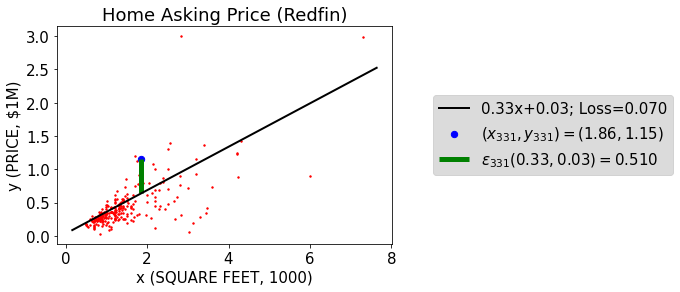

In [ ]:
(m_1,b_1,firstcolor)=(1.2*m_opt,0.8*b_opt,"black")
lf=LR.linear_function((m_1,b_1))
temp=pandas.concat([X,Y],axis="columns")
temp["line"]=lf(X)
temp["eps"]=Y-temp["line"]
tempsorted=temp.sort_values(by="eps",axis="index",ascending=False)
toplot=tempsorted.iloc[5]
N=toplot.name
plt.scatter(X,Y,color=data_color,s=markersize)
xlims=numpy.array(plt.gca().get_xlim())
plt.plot(xlims,lf(xlims),label="{0:.2f}x+{1:.2f}; Loss={2:.3f}".format(m_1,b_1,LR.Loss((m_1,b_1))),color=firstcolor,linewidth=thinlinesize)
plt.scatter(toplot[feature],toplot[label],color="blue",s=markersize*20,
            label=r"$(x_{{{0:}}},y_{{{0:}}})=({1:.2f},{2:.2f})$".format(N,toplot[feature],toplot[label]))
plt.vlines(toplot[feature],ymin=toplot["line"],ymax=toplot[label],color="green",linewidth=5,
          label=r"$\varepsilon_{{{0:}}}({1:.2f},{2:.2f})={3:.3f}$".format(N,m_1,b_1,toplot["eps"]))
title=[]
title.append(plot_title)
plt.title("\n".join(title))
plt.xlabel("x ({0:s}, 1000)".format(feature))
plt.ylabel("y ({0:s}, $1M)".format(label))
#tick = mtick.StrMethodFormatter("${x:,.0f}")
#plt.gca().yaxis.set_major_formatter(tick)
legend("side",ncol=1)
saver("singleerror")
plt.show()
plt.close()

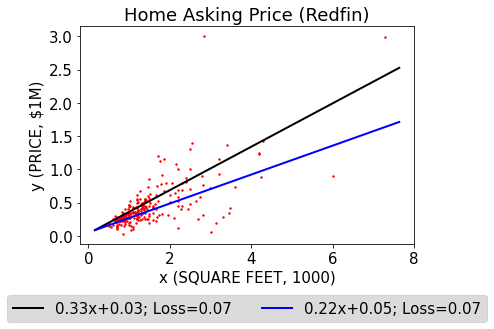

In [ ]:
(m_1,b_1,firstcolor)=(1.2*m_opt,0.8*b_opt,"black")
(m_2,b_2,secondcolor)=(0.8*m_opt,1.2*b_opt,"blue")
plt.figure()
plt.scatter(X,Y,color=data_color,s=markersize)
xlims=numpy.array(plt.gca().get_xlim())
plt.plot(xlims,LR.linear_function([m_1,b_1])(xlims),label="{0:.2f}x+{1:.2f}; Loss={2:.2f}".format(m_1,b_1,LR.Loss([m_1,b_1])),color=firstcolor,linewidth=thinlinesize)
plt.plot(xlims,LR.linear_function([m_2,b_2])(xlims),label="{0:.2f}x+{1:.2f}; Loss={2:.2f}".format(m_2,b_2,LR.Loss([m_2,b_2])),color=secondcolor,linewidth=thinlinesize)
title=[]
title.append(plot_title)
plt.title("\n".join(title))
plt.xlabel("x ({0:s}, 1000)".format(feature))
plt.ylabel("y ({0:s}, $1M)".format(label))
#tick = mtick.StrMethodFormatter("${x:,.0f}")
#plt.gca().yaxis.set_major_formatter(tick)
legend("bottom")
saver("costlines")
plt.show()
plt.close()

In [ ]:
(dm_opt,db_opt)=(2*numpy.abs(m_opt),10*numpy.abs(b_opt))
Mvals = numpy.linspace(m_opt-dm_opt,m_opt+dm_opt)
Bvals = numpy.linspace(b_opt-db_opt,b_opt+db_opt)
Mgrid, Bgrid = numpy.meshgrid(Mvals, Bvals)
Err=numpy.array([[LR.Loss([m,b]) for m in Mvals] for b in Bvals])
Err=numpy.sqrt(Err-numpy.min(Err))
#levels=numpy.linspace(start=minE,stop=minE+numpy.ptp(Err)/10,num=10)
levels=numpy.linspace(start=numpy.min(Err),stop=numpy.max(Err),num=10)

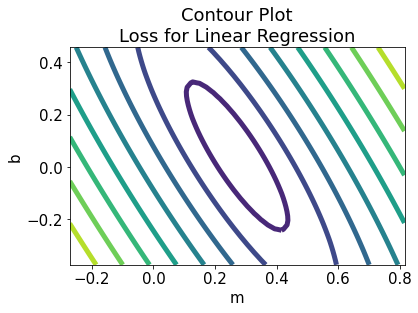

In [ ]:
plt.figure
plt.contour(Mvals,Bvals,Err,levels=levels)
title=[]
title.append("Contour Plot")
title.append("Loss for Linear Regression")
plt.title("\n".join(title))
plt.xlim(0.62,0.72)
plt.xlim(m_opt-dm_opt,m_opt+dm_opt)
plt.ylim(b_opt-db_opt,b_opt+db_opt)
plt.xlabel("m")
plt.ylabel("b")
saver("contour")
plt.show()
plt.close()

In [ ]:
(m_init,b_init)=(1.8*m_opt,1.1*b_opt)
_,(dm_init,db_init)=LR.Loss([m_init,b_init],include_gradient=True)

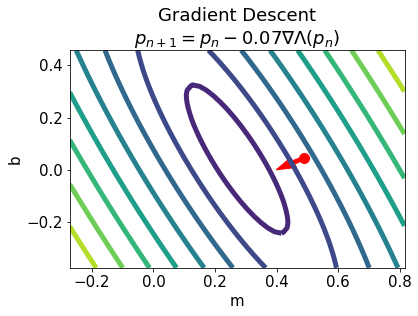

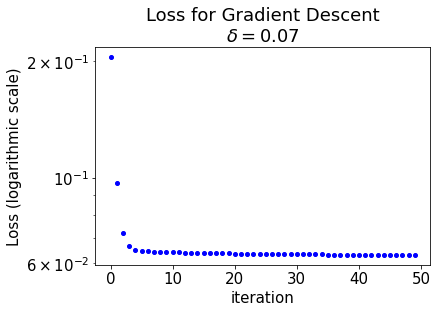

In [ ]:
delta=0.07
plt.figure
plt.contour(Mvals,Bvals,Err,levels=levels)
title=[]
title.append("Gradient Descent")
title.append(r"$p_{{n+1}}=p_n-{0:.2f}\nabla \Lambda(p_n)$".format(delta))
plt.scatter(m_init,b_init,s=100,color="red")
plt.arrow(m_init,b_init,-dm_init*delta,-db_init*delta,width=.2*delta,color="r",length_includes_head=True)
plt.title("\n".join(title))
plt.xlim(0.62,0.72)
plt.xlim(m_opt-dm_opt,m_opt+dm_opt)
plt.ylim(b_opt-db_opt,b_opt+db_opt)
plt.xlabel("m")
plt.ylabel("b")
saver("contour_smalldelta")
plt.show()
plt.close()

state=[m_init,b_init]
Losses=[]
N=50
for n in range(N):
    loss,gradient=LR.Loss(state,include_gradient=True)
    Losses.append(loss)
    state=state-delta*gradient

title=[]
title.append("Loss for Gradient Descent")
title.append(r"$\delta={:.2f}$".format(delta))
plt.figure()
plt.semilogy(Losses, 'bo',ms=4)
plt.ylabel("Loss (logarithmic scale)")
plt.xlabel("iteration")
plt.title("\n".join(title))
saver("decreasing_cost")
plt.show()
plt.close()

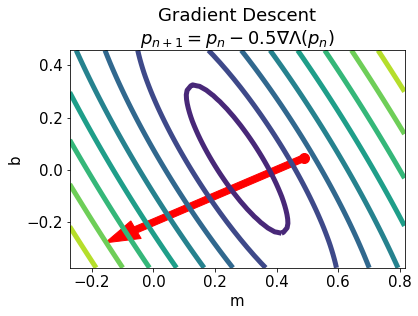

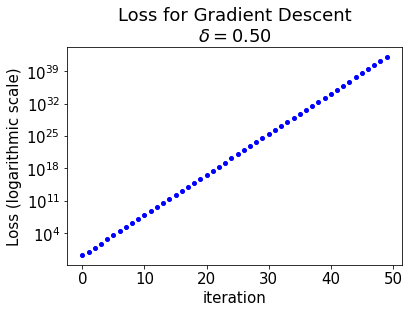

In [ ]:
delta=0.5
plt.figure
plt.contour(Mvals,Bvals,Err,levels=levels)
title=[]
title.append("Gradient Descent")
title.append(r"$p_{{n+1}}=p_n-{0:}\nabla \Lambda(p_n)$".format(delta))
plt.scatter(m_init,b_init,s=100,color="red")
plt.arrow(m_init,b_init,-dm_init*delta,-db_init*delta,width=.05*delta,color="r",length_includes_head=True)
plt.title("\n".join(title))
plt.xlim(0.62,0.72)
plt.xlim(m_opt-dm_opt,m_opt+dm_opt)
plt.ylim(b_opt-db_opt,b_opt+db_opt)
plt.xlabel("m")
plt.ylabel("b")
saver("contour_largedelta")
plt.show()
plt.close()

state=[m_init,b_init]
Losses=[]
N=50
for n in range(N):
    loss,gradient=LR.Loss(state,include_gradient=True)
    Losses.append(loss)
    state=state-delta*gradient

title=[]
title.append("Loss for Gradient Descent")
title.append(r"$\delta={:.2f}$".format(delta))
plt.figure()
plt.semilogy(Losses, 'bo',ms=4)
plt.ylabel("Loss (logarithmic scale)")
plt.xlabel("iteration")
plt.title("\n".join(title))
saver("increasing_cost")
plt.show()
plt.close()

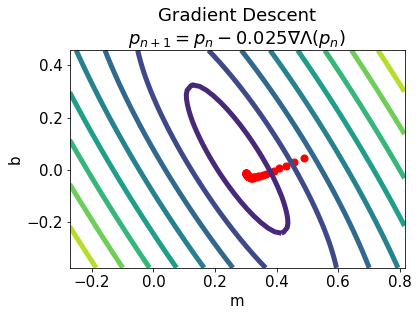

In [ ]:
delta=0.025
state=[m_init,b_init]
states=[state]
Losses=[]
N=50
for n in range(N):
    loss,gradient=LR.Loss(state,include_gradient=True)
    Losses.append(loss)
    state=state-delta*gradient
    states.append(state)


states_x=[x for (x,_) in states]
states_y=[y for (_,y) in states]
plt.figure
plt.contour(Mvals,Bvals,Err,levels=levels)
title=[]
title.append("Gradient Descent")
title.append(r"$p_{{n+1}}=p_n-{0:}\nabla \Lambda(p_n)$".format(delta))
plt.scatter(states_x,states_y,s=50,color="red")
plt.title("\n".join(title))
plt.xlim(0.62,0.72)
plt.xlim(m_opt-dm_opt,m_opt+dm_opt)
plt.ylim(b_opt-db_opt,b_opt+db_opt)
plt.xlabel("m")
plt.ylabel("b")
saver("grad_flow")
plt.show()
plt.close()

0.2718547212372187
0.04152297083103035


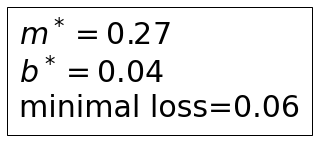

In [ ]:
slope,intercept,_,_,_=scipy.stats.linregress(X,Y)
mincost=LR.Loss([slope,intercept])
print(slope)
print(intercept)
text=[]
text.append(r"$m^*={0:.2f}$".format(slope))
text.append(r"$b^*={0:.2f}$".format(intercept))
text.append("minimal loss={0:.2f}".format(mincost))
textbox(text,fname="bestline")

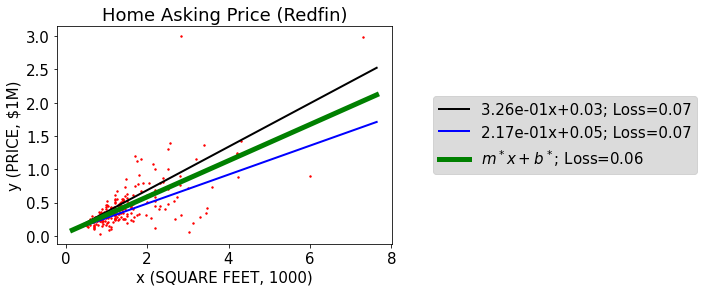

In [ ]:
(m_1,b_1,firstcolor)=(1.2*m_opt,0.8*b_opt,"black")
(m_2,b_2,secondcolor)=(0.8*m_opt,1.2*b_opt,"blue")
(m_best,b_best,bestcolor)=(slope,intercept,"green")
plt.figure()
plt.scatter(X,Y,color=data_color,s=markersize)
xlims=numpy.array(plt.gca().get_xlim())
plt.plot(xlims,LR.linear_function([m_1,b_1])(xlims),label="{0:.2e}x+{1:.2f}; Loss={2:.2f}".format(m_1,b_1,LR.Loss([m_1,b_1])),color=firstcolor,linewidth=thinlinesize)
plt.plot(xlims,LR.linear_function([m_2,b_2])(xlims),label="{0:.2e}x+{1:.2f}; Loss={2:.2f}".format(m_2,b_2,LR.Loss([m_2,b_2])),color=secondcolor,linewidth=thinlinesize)
plt.plot(xlims,LR.linear_function([m_best,b_best])(xlims),label=r"$m^* x+b^*$; Loss={2:.2f}".format(m_best,b_best,LR.Loss([m_best,b_best])),color=bestcolor)
title=[]
title.append(plot_title)
plt.title("\n".join(title))
plt.xlabel("x ({0:s}, 1000)".format(feature))
plt.ylabel("y ({0:s}, $1M)".format(label))
legend("side")
saver("bestcostlines")
plt.show()
plt.close()

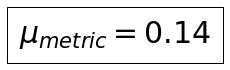

In [ ]:
text=[]
text.append(r"$\mu_{{metric}}={0:.2f}$".format(LR.metric([slope,intercept])))
textbox(text,fname="metric")

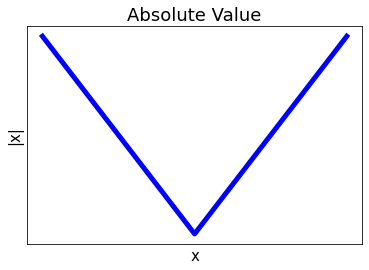

In [ ]:
plt.figure()
plt.plot([-1,0,1],[1,0,1],color="blue")
plt.xticks([],[])
plt.yticks([],[])
title=[]
title.append("Absolute Value")
plt.title("\n".join(title))
plt.xlabel("x")
plt.ylabel("|x|")
saver("abs_x")
plt.show()
plt.close()

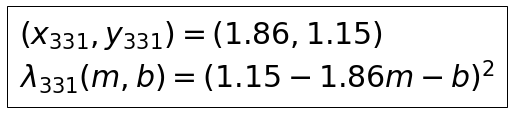

In [ ]:
text=[]
text.append(r"$(x_{{{0:d}}},y_{{{0:d}}})=({1:.2f},{2:.2f})$".format(toplot.name,toplot[feature],toplot[label]))
text.append(r"$\lambda_{{{0:d}}}(m,b)=({2:.2f}-{1:.2f}m-b)^2$".format(toplot.name,toplot[feature],toplot[label]))
textbox(text,fname="singlecost")